In [1]:
#In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class. 

#Hint: 
#import numpy as np 
#import matplotlib.pyplot as plt 
#from mpl_toolkits.mplot3d import Axes3D 
#from sklearn import decomposition 
#from sklearn import datasets

In [2]:
#solutions:

#Import Libraries
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition 
from sklearn import datasets 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#Load IRIS Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [4]:
#display top 5 data
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Analyse the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#target variables values
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
#3D data

#PCA is effected by scale so we need to scale the features in our data before applying PCA. 

#Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

#If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#separating out the features
x = df.loc[:, features].values

#separating out the target
y = df.loc[:,['target']].values

#standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
#PCA Projection to 3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2','principal_component_3'])

In [11]:
#data with 3 dimensions earlier it was 4
principalDf.head(5)

,principal_component_1,principal_component_2,principal_component_3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [12]:
#concatenate with target variables
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [13]:
#data after adding target variables
finalDf.head(10)

,principal_component_1,principal_component_2,principal_component_3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
5,-2.070537,1.518549,0.030684,Iris-setosa
6,-2.445711,0.074563,0.342198,Iris-setosa
7,-2.233842,0.247614,-0.082574,Iris-setosa
8,-2.341958,-1.095146,0.153562,Iris-setosa
9,-2.188676,-0.448629,-0.246560,Iris-setosa


### Visualize and Plot 3D Chart

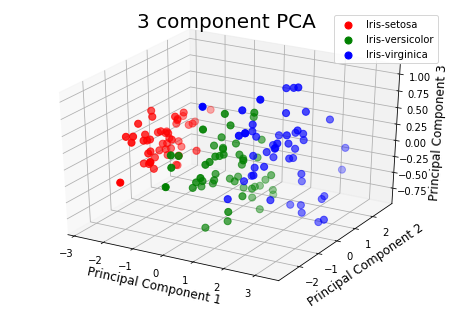

In [14]:
#Visualize the 3D Data with Plot

#Set the 3d Plot
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
fig.add_subplot(211, projection='3d')
ax = Axes3D(fig)

#Set the Label
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3', fontsize = 12)
ax.set_title('3 component PCA', fontsize = 20)

#Set the Color of 3D
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

#Loop through and Plot 3D
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal_component_1']
               ,finalDf.loc[indicesToKeep, 'principal_component_2']
               ,finalDf.loc[indicesToKeep, 'principal_component_3']
               , c = color
               , s = 50)
#Add Legend
ax.legend(targets)

#Add Grid to the 3D image
ax.grid()
